# ***Data Source***

Source : https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset?resource=download

# **I. Perkenalan**

```
=======================================================================================================================================
Milestone 2 (Phase 1)

Nama  : Achmed Alridho Zulkarnaen
Batch : RMT-037

File ipynb ini berisikan pembuatan model machine learning `Klasifikasi`. Model ini nantinya akan digunakan untuk `Churn Prediction` dimana nantinya akan mengklasifikasikan apakah pelanggan akan meninggalkan layanan pada bank X atau tidak.
=======================================================================================================================================
```

# **II. Identifikasi Masalah**

### Latar Belakang

Sebagai seorang Data Scientist yang baru bergabung di Bank X, tanggung jawab utama saya adalah menganalisis perilaku nasabah untuk mengidentifikasi risiko churn. Bank X unggul dalam memberikan layanan perbankan yang inovatif, pengalaman nasabah yang terpersonalisasi, serta penawaran produk yang relevan, menjadikannya pilihan utama di industri perbankan. Dalam kondisi persaingan yang semakin ketat, kemampuan untuk mengenali nasabah yang berpotensi melakukan churn sangatlah krusial untuk meningkatkan tingkat retensi dan mempertahankan loyalitas mereka. Melalui data transaksi dan interaksi nasabah, serta penerapan algoritma Machine Learning, saya mengembangkan model untuk mengklasifikasikan potensi churn nasabah, yang bertujuan meningkatkan strategi retensi dan menjaga nasabah dengan nilai tinggi tetap bertahan.

### Objective
Proyek ini bertujuan mengembangkan model Machine Learning untuk mengklasifikasikan apakah nasabah berpotensi untuk churn atau tetap menjadi pelanggan aktif di masa depan. Model ini akan dibangun berdasarkan berbagai fitur seperti skor kredit, usia, lama berlangganan (tenure), saldo akun, jumlah produk yang dimiliki, dan status keaktifan nasabah. Fokus utama dari model ini adalah mengurangi jumlah False Negative, yaitu ketika nasabah yang berpotensi churn justru tidak terdeteksi oleh model. Mengurangi False Negative sangat penting agar bank dapat mengambil tindakan preventif terhadap nasabah yang mungkin akan meninggalkan layanan. Hasil klasifikasi ini akan membantu Bank X dalam melakukan intervensi yang lebih tepat waktu, meningkatkan strategi retensi, dan menjaga hubungan dengan nasabah yang bernilai tinggi agar tetap loyal kepada bank.

### Informasi Yang Bank X Ingin Dapatkan
1. Algoritma apa saja yang digunakan untuk membuat model, algoritma apa yang akhirnya dipilih dan bagaimana hasil hyperparameter tuningnya?
2. Apa kelebihan dan kekurangan dari model yang sudah di buat?
3. Kira-kira apa yang bisa di lakukan untuk improve model yang sudah di buat?
4. Apa saja informasi yang berhasil didapatkan dari melakukan EDA?

# **III. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import pickle
import re

# Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

# Feature Selection
from phik.report import plot_correlation_matrix

# Hyperparameter Tuning & Model Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.model_selection import GridSearchCV

# Multicollinearity Test
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Evaluasi
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix, recall_score

# Data Balancing
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings(action='ignore')

# **IV. Data Loading**

## Data Source

Data Source : Source : https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset?resource=download

```txt
Features:

* RowNumber       : The sequential number assigned to each row in the dataset.
* CustomerId      : A unique identifier for each customer.
* Surname         : The surname of the customer.
* CreditScore     : The credit score of the customer.
* Geography       : The geographical location of the customer (e.g., country or region).
* Gender          : The gender of the customer.
* Age             : The age of the customer.
* Tenure          : The number of years the customer has been with the bank.
* Balance         : The account balance of the customer.
* NumOfProducts   : The number of bank products the customer has.
* HasCrCard       : Indicates whether the customer has a credit card (binary: yes/no).
* IsActiveMember  : Indicates whether the customer is an active member (binary: yes/no).
* EstimatedSalary : The estimated salary of the customer.
* Exited          : Indicates whether the customer has exited the bank (binary: yes/no).
```

## Load CSV

In [2]:
missing_values = ["n/a", "na", "--",'?',' nan', 'no',' ?']
df = pd.read_csv('Churn_Modelling.csv',na_values=missing_values)

Load data dan cek non-standard missing values.

In [3]:
data = df.copy()

Membuat copy dari df original.

In [4]:
# Untuk melihat sebelum nama column
pd.set_option('display.max.columns',None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Seluruh data sudah sesuai data typenya dan juga tidak ditemukan adanya missing value. Bisa di lihat juga terdapat `10.000` jumlah entry data

* Selanjutnya saya ingin melihat kondisi data dalam tabel seperti apa, maka saya akan melihat 10 data teratas saja

In [6]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


Berikut adalah 10 data teratas

## Data Dupe Check

In [7]:
df.duplicated().sum()

np.int64(0)

Tidak terdapat data duplikat, maka akan lanjut ke tahap berikutnya.

## Cek Missing Value

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Tidak terdapat missing value pada df.

## Describe Data

In [9]:
# Menonaktifkan notasi ilmiah agar seluruh angka ditampilkan
pd.set_option('display.float_format', '{:.3f}'.format)

# Describe() untuk melihat hasilnya
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


* Berikut adalah hasil describe data column numerik, selanjutnya akan di jelaskan pada EDA.

## Melakukan Remove Whitespace

In [10]:
# Remove Whitespace judul column
df.columns = df.columns.str.strip()
# Remove Whitespace semua column
for col in df.columns:
    if df[col].dtype == "object":
        df.loc[:, col] = df[col].str.strip()

Seluruh whitespace dari column yang memiliki tipe categorical sudah di hapus, serta judul column juga sudah di handle.

* Selanjutnya data sudah bisa di analisis lebih lanjut di EDA

# **V. Exploratory Data Analysis (EDA)**

## Data Analysis

Membuat Copy dari df untuk dilakukan EDA

In [11]:
df_eda = df.copy()
df_eda

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


In [12]:
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


* Skor kredit rata-rata pelanggan sekitar 650, dengan variasi yang cukup besar. 

* Rata-rata usia pelanggan adalah 39 tahun, sementara durasi mereka bersama bank berkisar rata-rata 5 tahun. 

* Sebagian besar memiliki saldo rendah atau nol, tetapi beberapa memiliki saldo yang tinggi, hingga 250,898. 

* Produk bank yang dimiliki umumnya hanya satu atau dua, dengan mayoritas memiliki kartu kredit (70.6%) dan sekitar setengahnya adalah anggota aktif (51.5%). 

* Rata-rata pendapatan adalah 100,090, dan hanya sekitar 20% pelanggan yang keluar dari bank. 

Secara keseluruhan, data ini menunjukkan variasi yang luas dalam karakteristik pelanggan, seperti kredit, usia, dan saldo, yang berpotensi memengaruhi risiko churn.

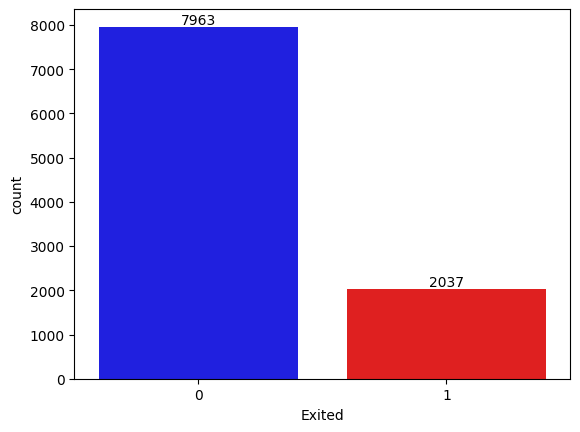

In [13]:
# Menghasilkan ulang plot dengan warna merah dan biru
ax = sns.countplot(data=df, x='Exited', palette=['blue', 'red'])

# Memberikan label pada kedua bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# Tampilkan plot
plt.show()

Kesimpulan dari visualisasi ini adalah bahwa mayoritas pelanggan tidak keluar dari bank (7963), sementara hanya sebagian kecil yang melakukan churn atau keluar (2037). Ini menunjukkan bahwa bank memiliki tingkat retensi yang cukup tinggi, dengan hanya sekitar 23% pelanggan yang meninggalkan layanan.

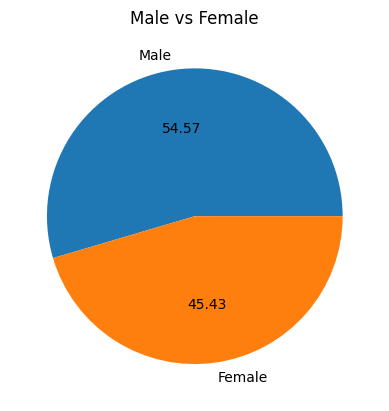

In [14]:
# Plot untuk Gender
df_eda.Gender.value_counts().plot(kind='pie', autopct='%.2f', title='Male vs Female')
plt.ylabel('')  # Menghapus label y untuk membuat lebih bersih
plt.show()

Bisa dilihat pada pie chart bahwa nasabah bank X kebanyakan laki-laki dengan jumlah sebesar 54.57% dari seluruh nasabah bank X di seluruh negara.

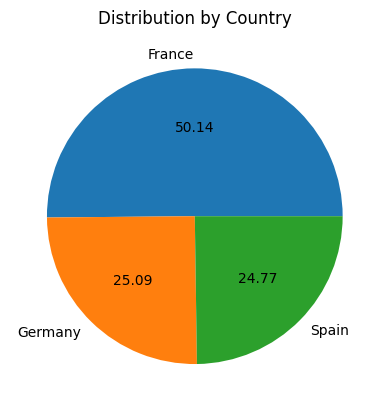

In [15]:
# Plot untuk Country
df_eda.Geography.value_counts().plot(kind='pie', autopct='%.2f', title='Distribution by Country')
plt.ylabel('')  # Menghapus label y untuk membuat lebih bersih
plt.show()

Terlihat pada pie chart bahwa nasabah bank X majoritas berasal dari negara France/Prancis sebanyak (50.14) dari seluruh nasabah, kemudian Germany/German (25.09) dan terakhir Spain/Spanyol (24.77).

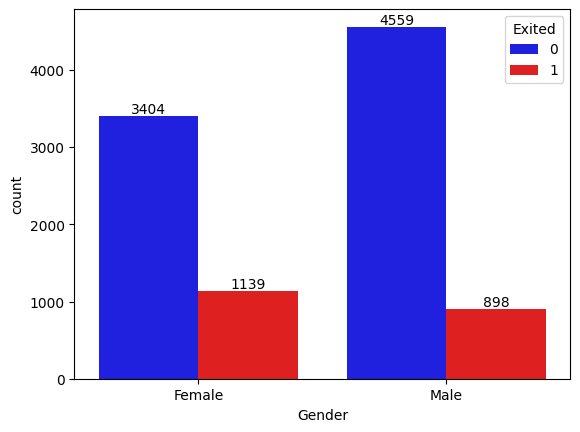

In [16]:
# Membuat plot countplot dengan hue berdasarkan 'Exited' dan memberikan warna merah dan biru
ax = sns.countplot(data=df, x='Gender', hue='Exited', palette=['blue', 'red'])

# Menambahkan label pada setiap bar untuk kedua kategori 'Exited' (0 dan 1)
for container in ax.containers:
    ax.bar_label(container)

# Menampilkan plot
plt.show()

Dari grafik di atas, dapat disimpulkan bahwa mayoritas nasabah yang tidak melakukan churn adalah laki-laki (4559), sementara jumlah nasabah perempuan yang tidak melakukan churn adalah 3404. Sementara itu, churn lebih tinggi terjadi pada nasabah perempuan (1139) dibandingkan dengan laki-laki (898). Hal ini menunjukkan bahwa perempuan memiliki kecenderungan churn yang lebih tinggi dibandingkan laki-laki di Bank X.

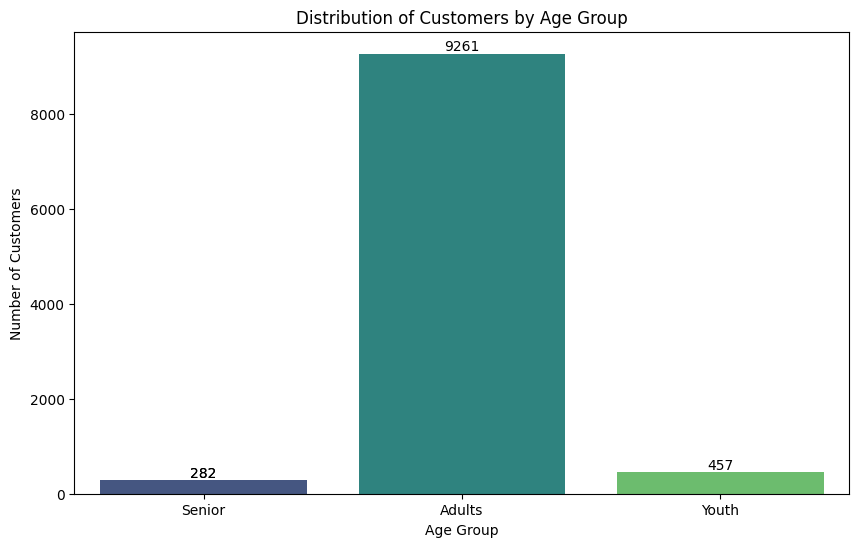

In [17]:
# Membuat fungsi untuk klasifikasi umur
def classify_age(age):
    if age <= 14:
        return 'Children'
    elif 15 <= age <= 24:
        return 'Youth'
    elif 25 <= age <= 64:
        return 'Adults'
    else:
        return 'Senior'

# Membuat column baru bernama Age_Group
df_eda['Age_Group'] = df_eda['Age'].apply(classify_age)

# Menghitung jumlah nasabah pada setiap age group
age_group_counts = df_eda['Age_Group'].value_counts()

# Plot kedalam bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis', order=['Senior','Adults','Youth'])
ax.bar_label(ax.containers[0])  # Adding labels to all bars

plt.title('Distribution of Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

Berdasarkan `Life cycle groupings` dari web `https://www.statcan.gc.ca/en/concepts/definitions/age2` umur dapat di klasifikasikan dengan:

* Children: 0–14 years old 
 
* Youth: 15–24 years old 
 
* Adults: 25–64 years old 
 
* Seniors: 65 years and older

Dari visualisasi distribusi usia nasabah Bank X, dapat disimpulkan bahwa sebagian besar nasabah berada dalam kelompok "Adults" (usia 25–64 tahun) dengan jumlah 9.261 orang. Sebaliknya, jumlah nasabah dalam kelompok "Senior" (usia 65 tahun ke atas) dan "Youth" (usia 15–24 tahun) jauh lebih sedikit, yaitu masing-masing 282 dan 457. Hal ini menunjukkan bahwa bank memiliki basis nasabah yang mayoritas berada di kelompok usia dewasa produktif, sementara keterlibatan nasabah dari kelompok usia senior dan muda relatif rendah.

In [18]:
df_eda.groupby(['Age_Group','Exited'])[['Exited']].count()

Exited
Age_Group Exited        
Adults    0         7307
          1         1954
Senior    0          239
          1           43
Youth     0          417
          1           40

Data menunjukkan bahwa sebagian besar nasabah yang tidak meninggalkan bank berasal dari kelompok "Adults" (7.307 orang), diikuti oleh jumlah churn sebesar 1.954 orang dari kelompok yang sama. Nasabah dari kelompok "Senior" dan "Youth" memiliki tingkat churn yang jauh lebih rendah dibandingkan dengan "Adults," dengan masing-masing hanya 43 dan 40 orang. Ini menunjukkan bahwa nasabah dewasa cenderung lebih rentan terhadap churn dibandingkan kelompok usia lainnya, sementara kelompok "Senior" dan "Youth" cenderung lebih stabil, meskipun secara proporsi mereka lebih kecil.

In [19]:
df_eda.groupby(['HasCrCard','Exited'])[['Exited']].count()

Exited
HasCrCard Exited        
0         0         2332
          1          613
1         0         5631
          1         1424

Dari data terlihat bahwa nasabah tanpa kartu kredit (HasCrCard = 0) lebih cenderung untuk tidak churn, dengan 2.332 nasabah yang bertahan dibandingkan 613 yang churn. Di sisi lain, nasabah dengan kartu kredit (HasCrCard = 1) memiliki lebih banyak nasabah yang bertahan (5.631), namun juga menunjukkan angka churn yang lebih tinggi (1.424). Ini menunjukkan bahwa meskipun memiliki kartu kredit terkait dengan jumlah nasabah yang lebih besar, tetap ada risiko churn yang signifikan pada kelompok ini.

In [20]:
df_eda.groupby(['IsActiveMember','Exited'])[['Exited']].count()

Exited
IsActiveMember Exited        
0              0         3547
               1         1302
1              0         4416
               1          735

Dari data, terlihat bahwa nasabah yang aktif (IsActiveMember = 1) cenderung lebih jarang churn dibandingkan nasabah yang tidak aktif. Sebanyak 4.416 nasabah aktif tetap bertahan, sedangkan hanya 735 yang churn. Di sisi lain, nasabah tidak aktif memiliki rasio churn yang lebih tinggi, dengan 1.302 churn dari total 4.849 nasabah. Ini menunjukkan bahwa tingkat keaktifan nasabah berkorelasi dengan loyalitas, di mana nasabah aktif lebih cenderung bertahan.

In [21]:
df_eda.groupby(['Geography','Exited'])[['Exited']].count()

Exited
Geography Exited        
France    0         4204
          1          810
Germany   0         1695
          1          814
Spain     0         2064
          1          413

Dari data, nasabah di Jerman memiliki rasio churn yang lebih tinggi dibandingkan dengan negara lainnya, dengan hampir separuh nasabahnya (814 dari 1.695) meninggalkan bank. Di sisi lain, nasabah dari Prancis memiliki tingkat churn yang lebih rendah, dengan 810 dari total 5.014 nasabah yang meninggalkan bank. Sementara itu, nasabah di Spanyol juga menunjukkan tingkat churn yang relatif lebih rendah. Ini menunjukkan adanya perbedaan perilaku churn antar negara, dengan Jerman memiliki tantangan retensi yang lebih besar dibandingkan Prancis dan Spanyol.

In [22]:
df_eda.groupby(['Gender','Exited'])[['Exited']].count()

Exited
Gender Exited        
Female 0         3404
       1         1139
Male   0         4559
       1          898

* Perempuan memiliki tingkat churn lebih tinggi dibandingkan laki-laki, dengan `1.139` nasabah perempuan keluar dari total `4.543`, sedangkan laki-laki yang churn berjumlah `898` dari total `5.457`.
* Ini menunjukkan bahwa nasabah perempuan lebih cenderung untuk meninggalkan bank dibandingkan nasabah laki-laki, yang bisa menjadi area penting untuk strategi retensi yang lebih fokus pada nasabah perempuan.

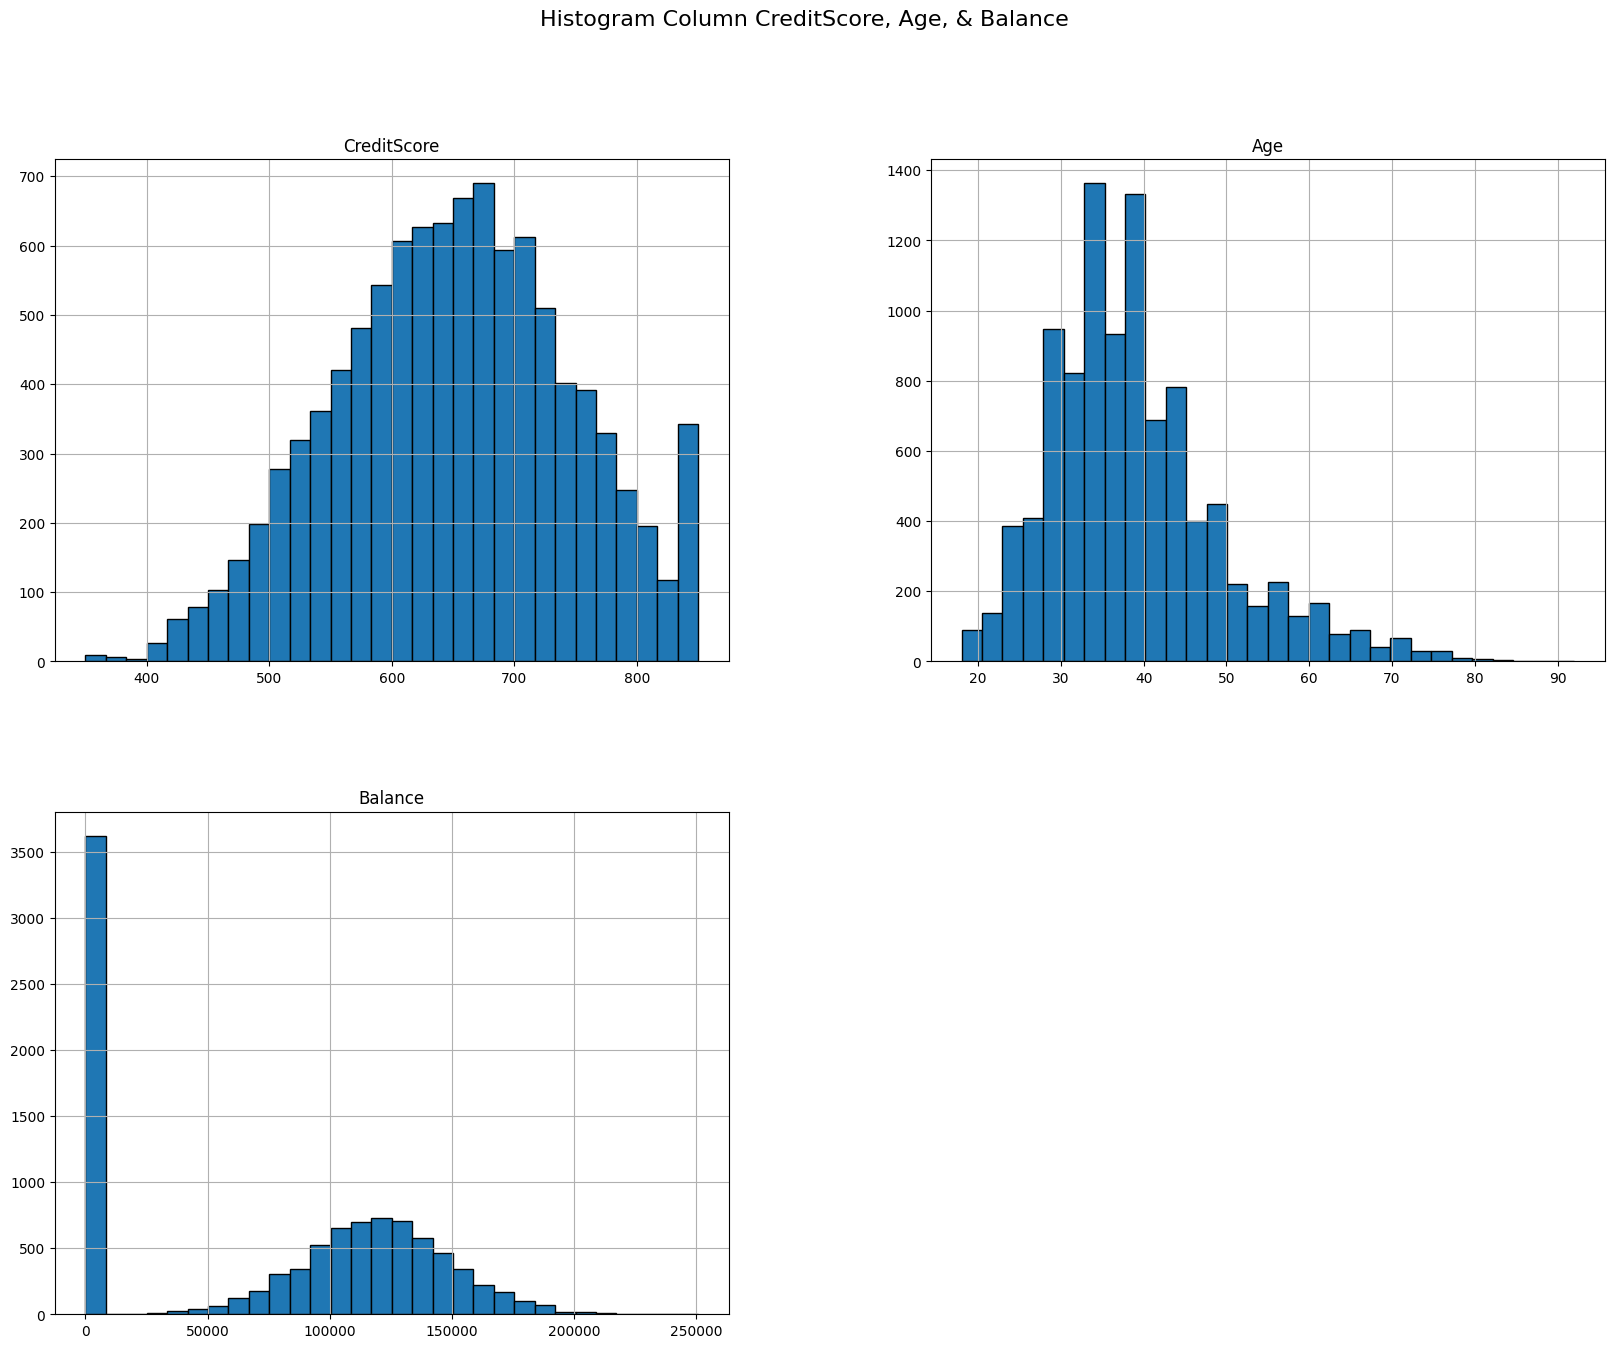

In [23]:
# Membuat histogram untuk column tertentu
df_selection = df_eda[['CreditScore', 'Age', 'Balance']]
df_selection.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle('Histogram Column CreditScore, Age, & Balance', fontsize=16)
plt.show()

Dari visualisasi histogram ini, berikut kesimpulan yang dapat ditarik:

* Credit Score: Sebaran skor kredit cenderung mendekati distribusi normal, dengan puncak di antara 600 hingga 750. Namun, terdapat lonjakan yang signifikan di sekitar 850, yang mungkin mengindikasikan outlier berupa nasabah dengan skor kredit sempurna.

* Age: Sebaran usia juga terlihat mendekati distribusi normal, dengan puncak pada usia 30-40 tahun. Tidak ada indikasi outlier yang jelas di kolom usia, meskipun ada sedikit nasabah yang berada di atas usia 60 tahun.

* Balance: Distribusi saldo terbilang cukup normal tetapi karena terdapat banyak nasabah yang memiliki saldo 0$ distribusi jadi skewed ke kanan. Lebih dari 3500 nasabah memiliki saldo 0$ dan sisanya memiliki saldo diatas 0$, di sekitar 100.000$ hingga 250.000$, yang menunjukkan indikasi adanya outlier pada column.

## Cek Korelasi Antar Column

In [24]:
# Untuk melihat korelasi antara variabel kategorikal dan numerikal saya menggunakan phik matrix
df_eda.phik_matrix().nlargest(15,'Exited')['Exited']

interval columns not set, guessing: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


Exited            1.000
NumOfProducts     0.565
Age               0.487
IsActiveMember    0.242
Balance           0.183
Gender            0.165
CreditScore       0.112
Geography         0.105
Age_Group         0.040
CustomerId        0.030
Tenure            0.029
RowNumber         0.000
Surname           0.000
HasCrCard         0.000
EstimatedSalary   0.000
Name: Exited, dtype: float64

interval columns not set, guessing: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


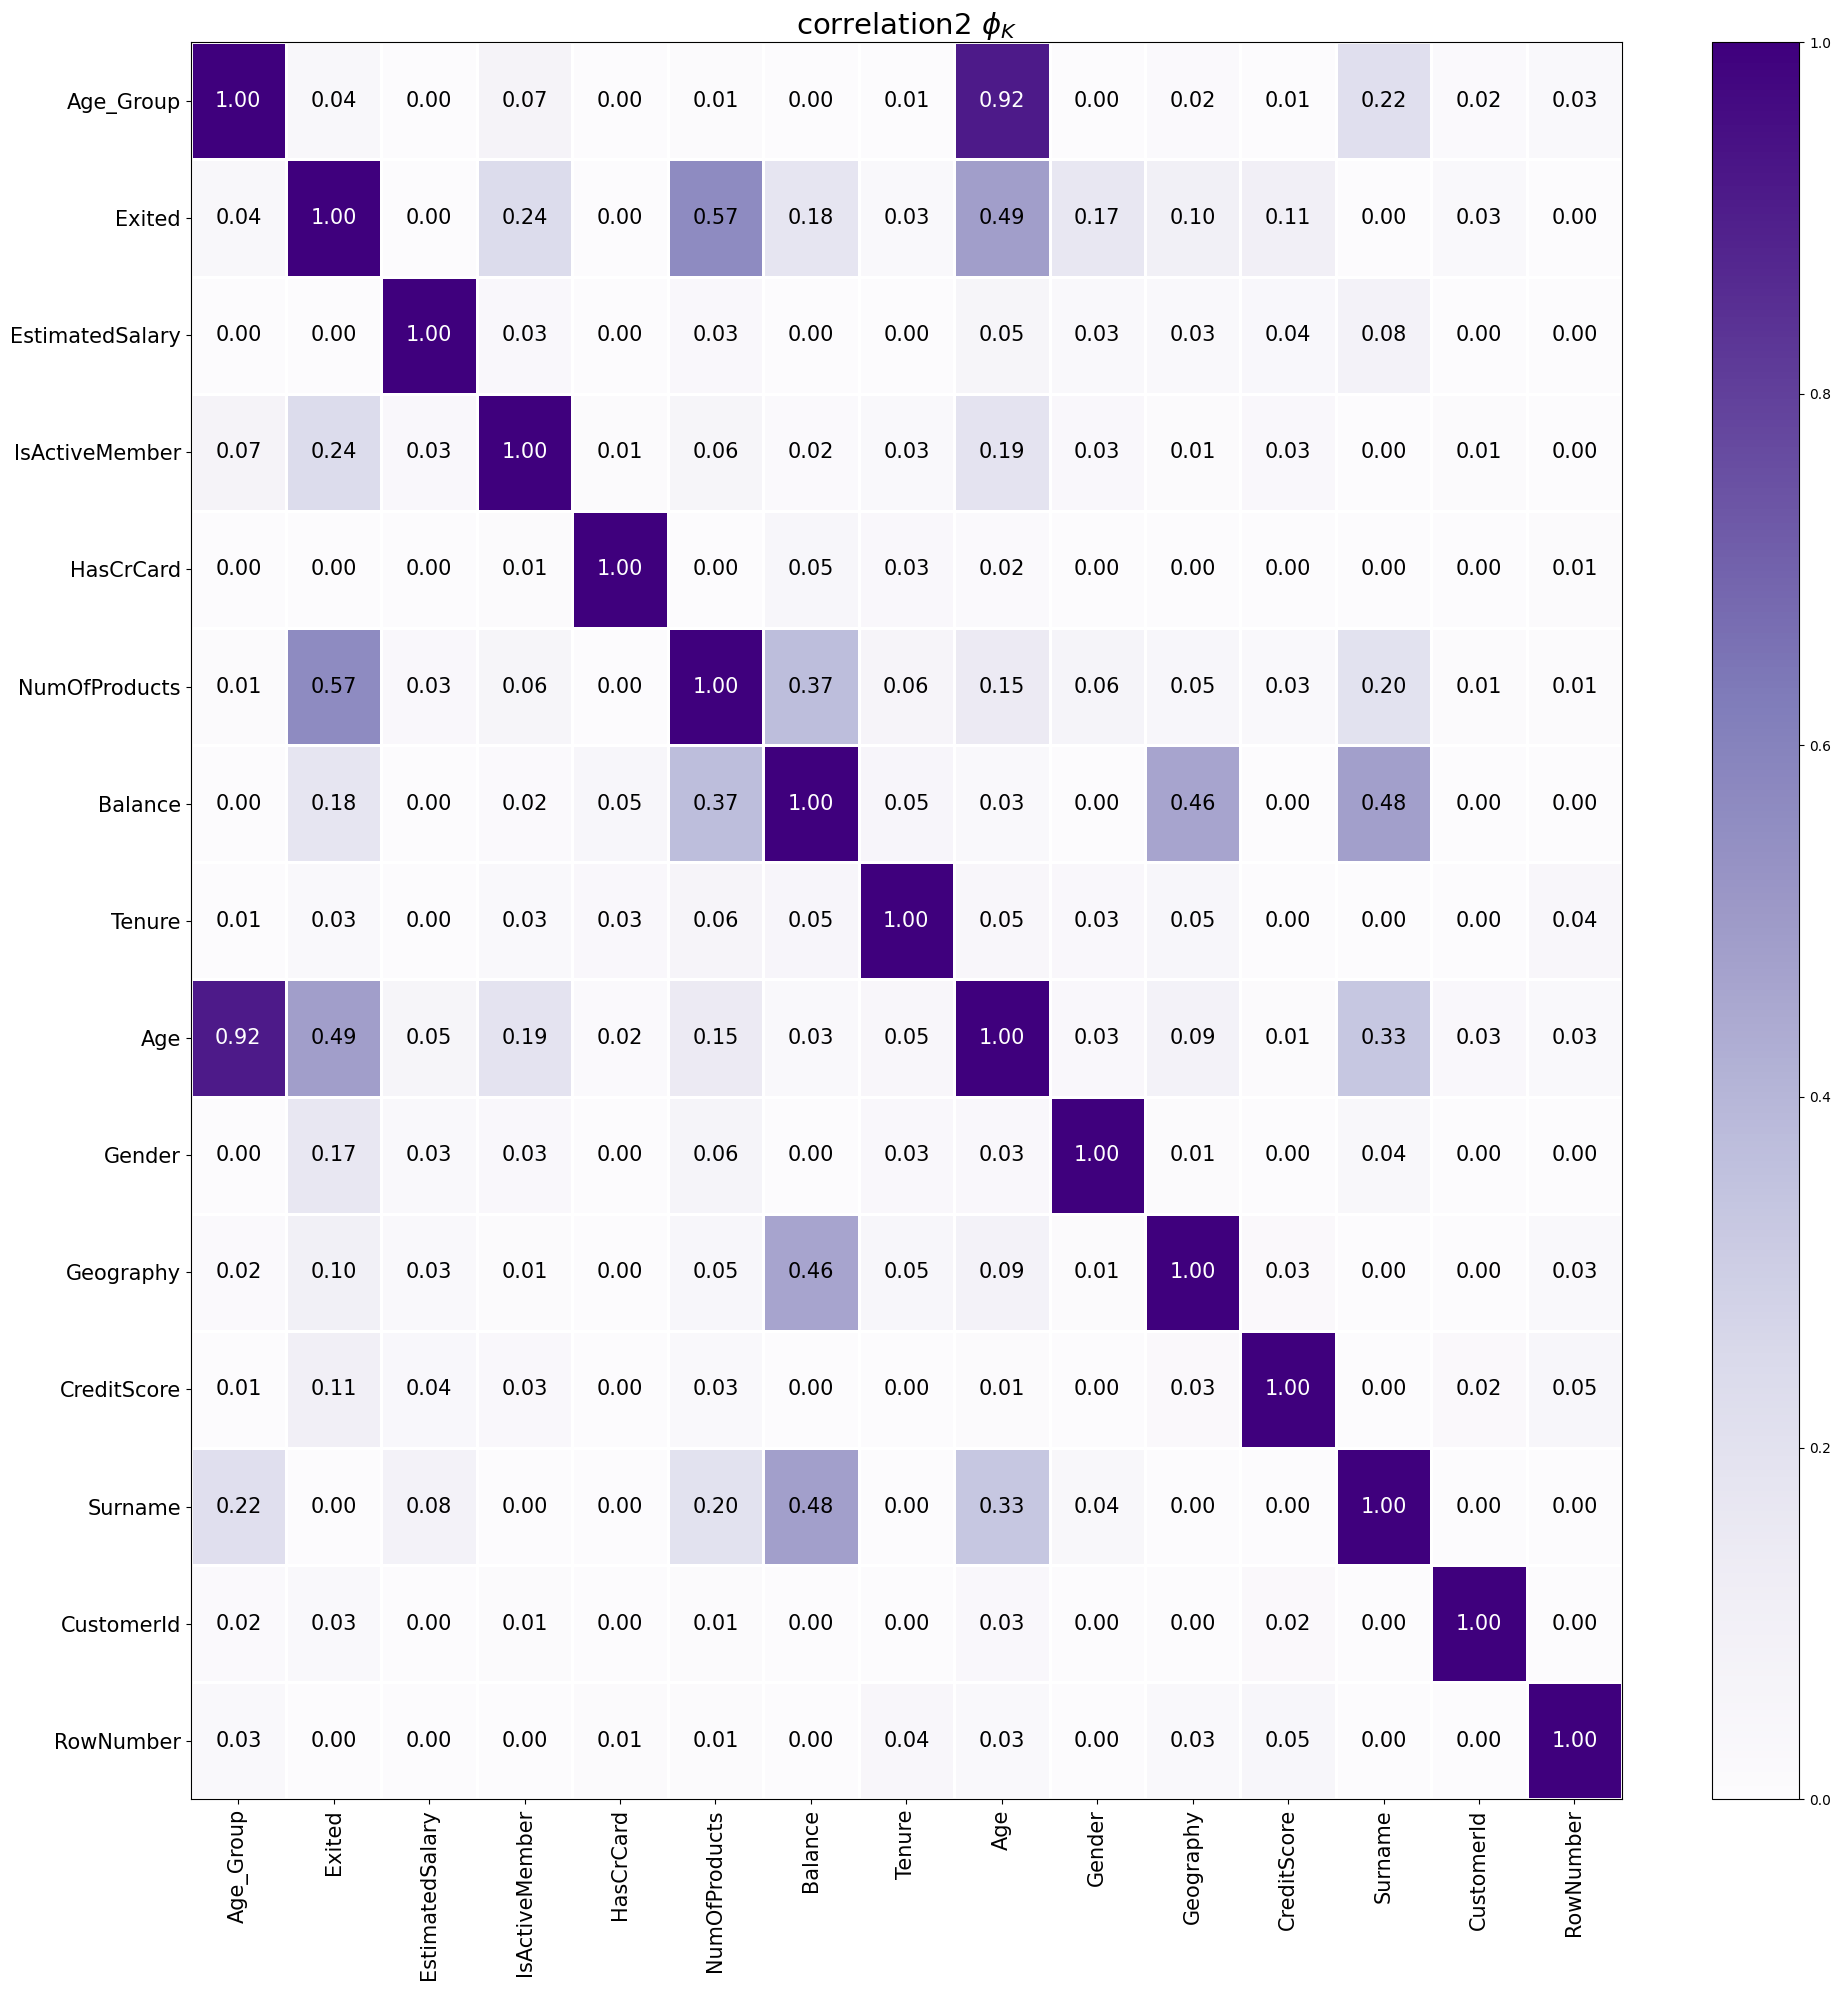

In [25]:
# Buat fungsi untuk mengkorelasikan semua column
def compute_phik_correlation(dataframe, columns):
    subset = dataframe[columns]
    correlation_matrix = subset.phik_matrix()
    return correlation_matrix

# Membuat list column yang ingin dikorelasikan
columns = ['RowNumber','CustomerId','Surname','CreditScore','Geography','Gender', 
    'Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember',
    'EstimatedSalary','Exited','Age_Group']

# Menghitung Phi-k corelation antara setiap column
correlation_eda = compute_phik_correlation(df_eda, columns)

plot_correlation_matrix(correlation_eda.values, x_labels=correlation_eda.columns, y_labels=correlation_eda.index, 
                        vmin=0, vmax=1, color_map='Purples', title=r'correlation2 $\phi_K$', fontsize_factor=1.5,
                        figsize=(20,20))
plt.tight_layout()

* Dari hasil korelasi phik di atas, dapat disimpulkan bahwa fitur NumOfProducts dan Age memiliki korelasi yang cukup signifikan dengan target Exited, dengan nilai korelasi masing-masing 0.57 dan 0.49. Ini menunjukkan bahwa jumlah produk yang dimiliki nasabah dan usia mereka berpengaruh dalam memprediksi apakah nasabah akan keluar dari bank.

* Fitur IsActiveMember (0.242) dan Balance (0.183) juga memiliki korelasi yang lebih rendah namun masih memberikan informasi penting. Sementara itu, fitur seperti CreditScore, Geography, dan Gender memiliki korelasi yang lebih rendah (< 0.2), namun mungkin masih dapat menambah nilai prediktif ketika digunakan bersama fitur-fitur lainnya.

* Fitur dengan korelasi sangat rendah atau nol seperti HasCrCard, EstimatedSalary, Surname, CustomerId, dan RowNumber tidak memberikan informasi signifikan untuk prediksi churn, sehingga kemungkinan besar dapat dihapus untuk meningkatkan efisiensi model.

# **VI. Feature Engineering**

### Split antara X (features) dan y (target)

In [26]:
# Splitting between 'X' and 'y'
X = df.drop(['Exited'], axis = 1)
y = df['Exited']
X

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.000,2,1,0,96270.640
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.610,1,1,1,101699.770
9997,9998,15584532,Liu,709,France,Female,36,7,0.000,1,0,1,42085.580
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.310,2,1,0,92888.520


### Splitting antara Train-Set dan Test-set

In [27]:
# Splitting antara train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 69)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (8000, 13)
Test Size:  (2000, 13)


### Uji Multicollinearity

In [28]:
# Multicollinearity test
def calc_vif(A):
    vif = pd.DataFrame()
    vif["variables"] = A.columns
    vif["VIF"] = [variance_inflation_factor(A.values, i) for i in range(A.shape[1])]
    return(vif)

Membuat function untuk cek multicollinearity test antar variabel dengan menghitung nilai VIF

In [29]:
# Mengambil hanya kolom numerik dari X_train
X_train_numerical = X_train.select_dtypes(include=['int64', 'float64'])

In [30]:
calc_vif(X_train_numerical)

,variables,VIF
0,RowNumber,4.021
1,CustomerId,83.127
2,CreditScore,46.614
3,Age,14.923
4,Tenure,3.991
5,Balance,2.761
6,NumOfProducts,8.718
7,HasCrCard,3.394
8,IsActiveMember,2.097
9,EstimatedSalary,4.029


Berdasarkan hasil VIF, terlihat bahwa beberapa variabel menunjukkan nilai multikolinearitas yang tinggi. Variabel seperti CustomerId (VIF = 83.127) dan CreditScore (VIF = 46.614) memiliki VIF yang sangat tinggi, menunjukkan adanya hubungan linear yang kuat dengan variabel lain, yang bisa menyebabkan overfitting dalam model. Variabel lainnya, seperti Age (VIF = 14.923), juga memiliki indikasi multikolinearitas yang cukup signifikan.

* Multikolinearitas ini nanti bisa di handle dengan fitur selection yang tepat dan juga akan dilakukan standardisasi menggunakan StandardScaler() atau normalisasi menggunakan MinMaxScaler().

### Cardinality Handling

Cek Cardinality

In [31]:
# Mengambil semua kolom X_train dengan tipe data object
object_columns = X_train.select_dtypes(include='object')

# Menampilkan cardinality (jumlah nilai unik) dari setiap kolom object di X_train
for col in object_columns.columns:
    print(f'{col}: {df[col].nunique()} unique values')

Surname: 2932 unique values
Geography: 3 unique values
Gender: 2 unique values


Terlihat terdapat 3 unique value pada `Geography` dan 2 pada `Gender`. Cardinality di kedua column ini sudah sangat sedikit. Untuk column `Surname`, cardinality akan di abaikan, karena menurut korelasi phik yang di lakukan, surname memiliki korelasi `0.000` dengan target, maka dari itu column ini memiliki peluang yang sangat tinggi untuk di drop di fitur selection nanti.

### Handling Missing Value

In [32]:
X_train.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [33]:
X_test.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [34]:
y_train.isnull().sum()

np.int64(0)

In [35]:
y_test.isnull().sum()

np.int64(0)

* Tidak ditemukan adanya missing value pada keseluruhan data, maka dari itu bisa langung masuk ke tahap berikutnya saja.

### Handling Outlier

In [36]:
# Check distribusi data untuk kolom numerikal saja
num_cols = X_train.select_dtypes(exclude='object').columns
skewness = []

for col in num_cols:
    skew_val = round(X_train[col].skew(), 1)
    skewness.append([col, skew_val, 'normal' if abs(skew_val) <= 0.5 else 'skewed'])

# Membuat dataframe dengan kolom yang benar
skewness = pd.DataFrame(skewness, columns=['Column', 'Skewness', 'Distribution'])
skewness

,Column,Skewness,Distribution
0,RowNumber,0.000,normal
1,CustomerId,0.000,normal
2,CreditScore,-0.100,normal
3,Age,1.000,skewed
4,Tenure,0.000,normal
5,Balance,-0.100,normal
6,NumOfProducts,0.700,skewed
7,HasCrCard,-0.900,skewed
8,IsActiveMember,-0.100,normal
9,EstimatedSalary,0.000,normal


In [37]:
# Mendapatkan kolom numerik dari X_train
num_train = X_train._get_numeric_data()

for k, v in num_train.items():
    # Cek skewness untuk menentukan metode yang digunakan
    if -0.5 <= round(v.skew(), 1) <= 0.5:
        # Distribusi normal -> hitung Z-score manual
        mean = v.mean()
        std = v.std()
        threshold = 3  # Threshold untuk outlier Z-score ±3

        # Identifikasi outlier berdasarkan Z-score
        v_outliers = v[(v < mean - threshold * std) | (v > mean + threshold * std)]

        # Batas bawah dan atas berdasarkan Z-score
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std
    else:
        # Distribusi tidak normal -> gunakan IQR
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3 - q1
        v_outliers = v[(v < q1 - 1.5 * iqr) | (v > q3 + 1.5 * iqr)]

        # Batas bawah dan atas berdasarkan IQR
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

    # Hitung persentase outlier
    perc = (len(v_outliers) / len(v)) * 100

    # Tampilkan hasil
    print(f"Column {k} - Lower bound: {round(lower_bound,3)}, Upper bound: {round(upper_bound,3)}, Outliers = {perc:.2f}%")

Column RowNumber - Lower bound: -3630.35, Upper bound: 13626.944, Outliers = 0.00%
Column CustomerId - Lower bound: 15475027.419, Upper bound: 15906939.413, Outliers = 0.00%
Column CreditScore - Lower bound: 361.629, Upper bound: 939.857, Outliers = 0.06%
Column Age - Lower bound: 14.0, Upper bound: 62.0, Outliers = 3.65%
Column Tenure - Lower bound: -3.697, Upper bound: 13.73, Outliers = 0.00%
Column Balance - Lower bound: -110285.767, Upper bound: 263312.144, Outliers = 0.00%
Column NumOfProducts - Lower bound: -0.5, Upper bound: 3.5, Outliers = 0.60%
Column HasCrCard - Lower bound: -1.5, Upper bound: 2.5, Outliers = 0.00%
Column IsActiveMember - Lower bound: -0.981, Upper bound: 2.017, Outliers = 0.00%
Column EstimatedSalary - Lower bound: -72643.342, Upper bound: 272839.132, Outliers = 0.00%


Hasil analisis menunjukkan bahwa sebagian besar kolom dalam dataset tidak memiliki outlier yang signifikan, dengan pengecualian pada beberapa kolom. Kolom `CreditScore` memiliki 0.06% data yang tergolong outlier, kolom `Age` memiliki 3.65% outlier, dan kolom `NumOfProducts` menunjukkan 0.60% outlier. Sementara itu, kolom lainnya seperti `RowNumber, CustomerId, Tenure, Balance, HasCrCard, IsActiveMember, dan EstimatedSalary` tidak mengandung outlier yang signifikan (0.00%). Secara keseluruhan, mayoritas data berada dalam rentang normal, namun beberapa nilai di luar batas ini memerlukan perhatian lebih untuk memitigasi potensi dampak negatif outlier terhadap performa model prediksi.

In [38]:
# Membuat fungsi untuk aplikasi winsorization (Skew)
def apply_winsor_skew(train, capping_method='iqr', tail='both', fold=1.5, variables=['NumOfProducts','Age']):
    winsoriser = Winsorizer(capping_method=capping_method, tail=tail, fold=fold, variables=variables)
    train_capped = winsoriser.fit_transform(train)
    return train_capped

Pembuatan fungsi ini untuk remove outlier pada column yang terdeteksi skewed

In [39]:
# Membuat fungsi untuk aplikasi winsorization (Normal)
def apply_winsor_normal(train, capping_method='gaussian', tail='both', fold=3, variables=['CreditScore']):
    winsoriserN = Winsorizer(capping_method=capping_method, tail=tail, fold=fold, variables=variables)
    train_capped = winsoriserN.fit_transform(train)
    return train_capped

Pembuatan fungsi ini untuk remove outlier pada column yang terdeteksi normal

In [40]:
X_train = apply_winsor_skew(X_train, fold=1.5)

Melakukan capping pada column 'NumOfProducts' dan 'Age' (skew)

In [41]:
X_train = apply_winsor_normal(X_train, fold=3)

Melakukan capping pada column 'CreditScore' (normal)

### Feature Selection

* Concat column X_train dan y_train untuk melihat korelasi antar fitur dan target menggunakan phik method.

In [42]:
# Concatenate X_train dan y_train
concat_train = pd.concat([X_train, y_train], axis=1)
concat_train.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7637,7638,15604196,Simpson,766.000,France,Male,32,6,185714.280,1.000,1,1,102502.500,0
1475,1476,15745080,Griffiths,634.000,France,Male,26,8,0.000,1.000,1,0,21760.960,0
6540,6541,15656322,Sandover,571.000,Germany,Male,33,3,71843.150,1.000,1,0,26772.040,0
6164,6165,15608109,Greco,710.000,Germany,Male,58,7,170113.000,2.000,0,1,10494.640,0
1353,1354,15623644,Frolov,626.000,Spain,Male,29,7,0.000,2.000,1,0,49361.840,0


interval columns not set, guessing: ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


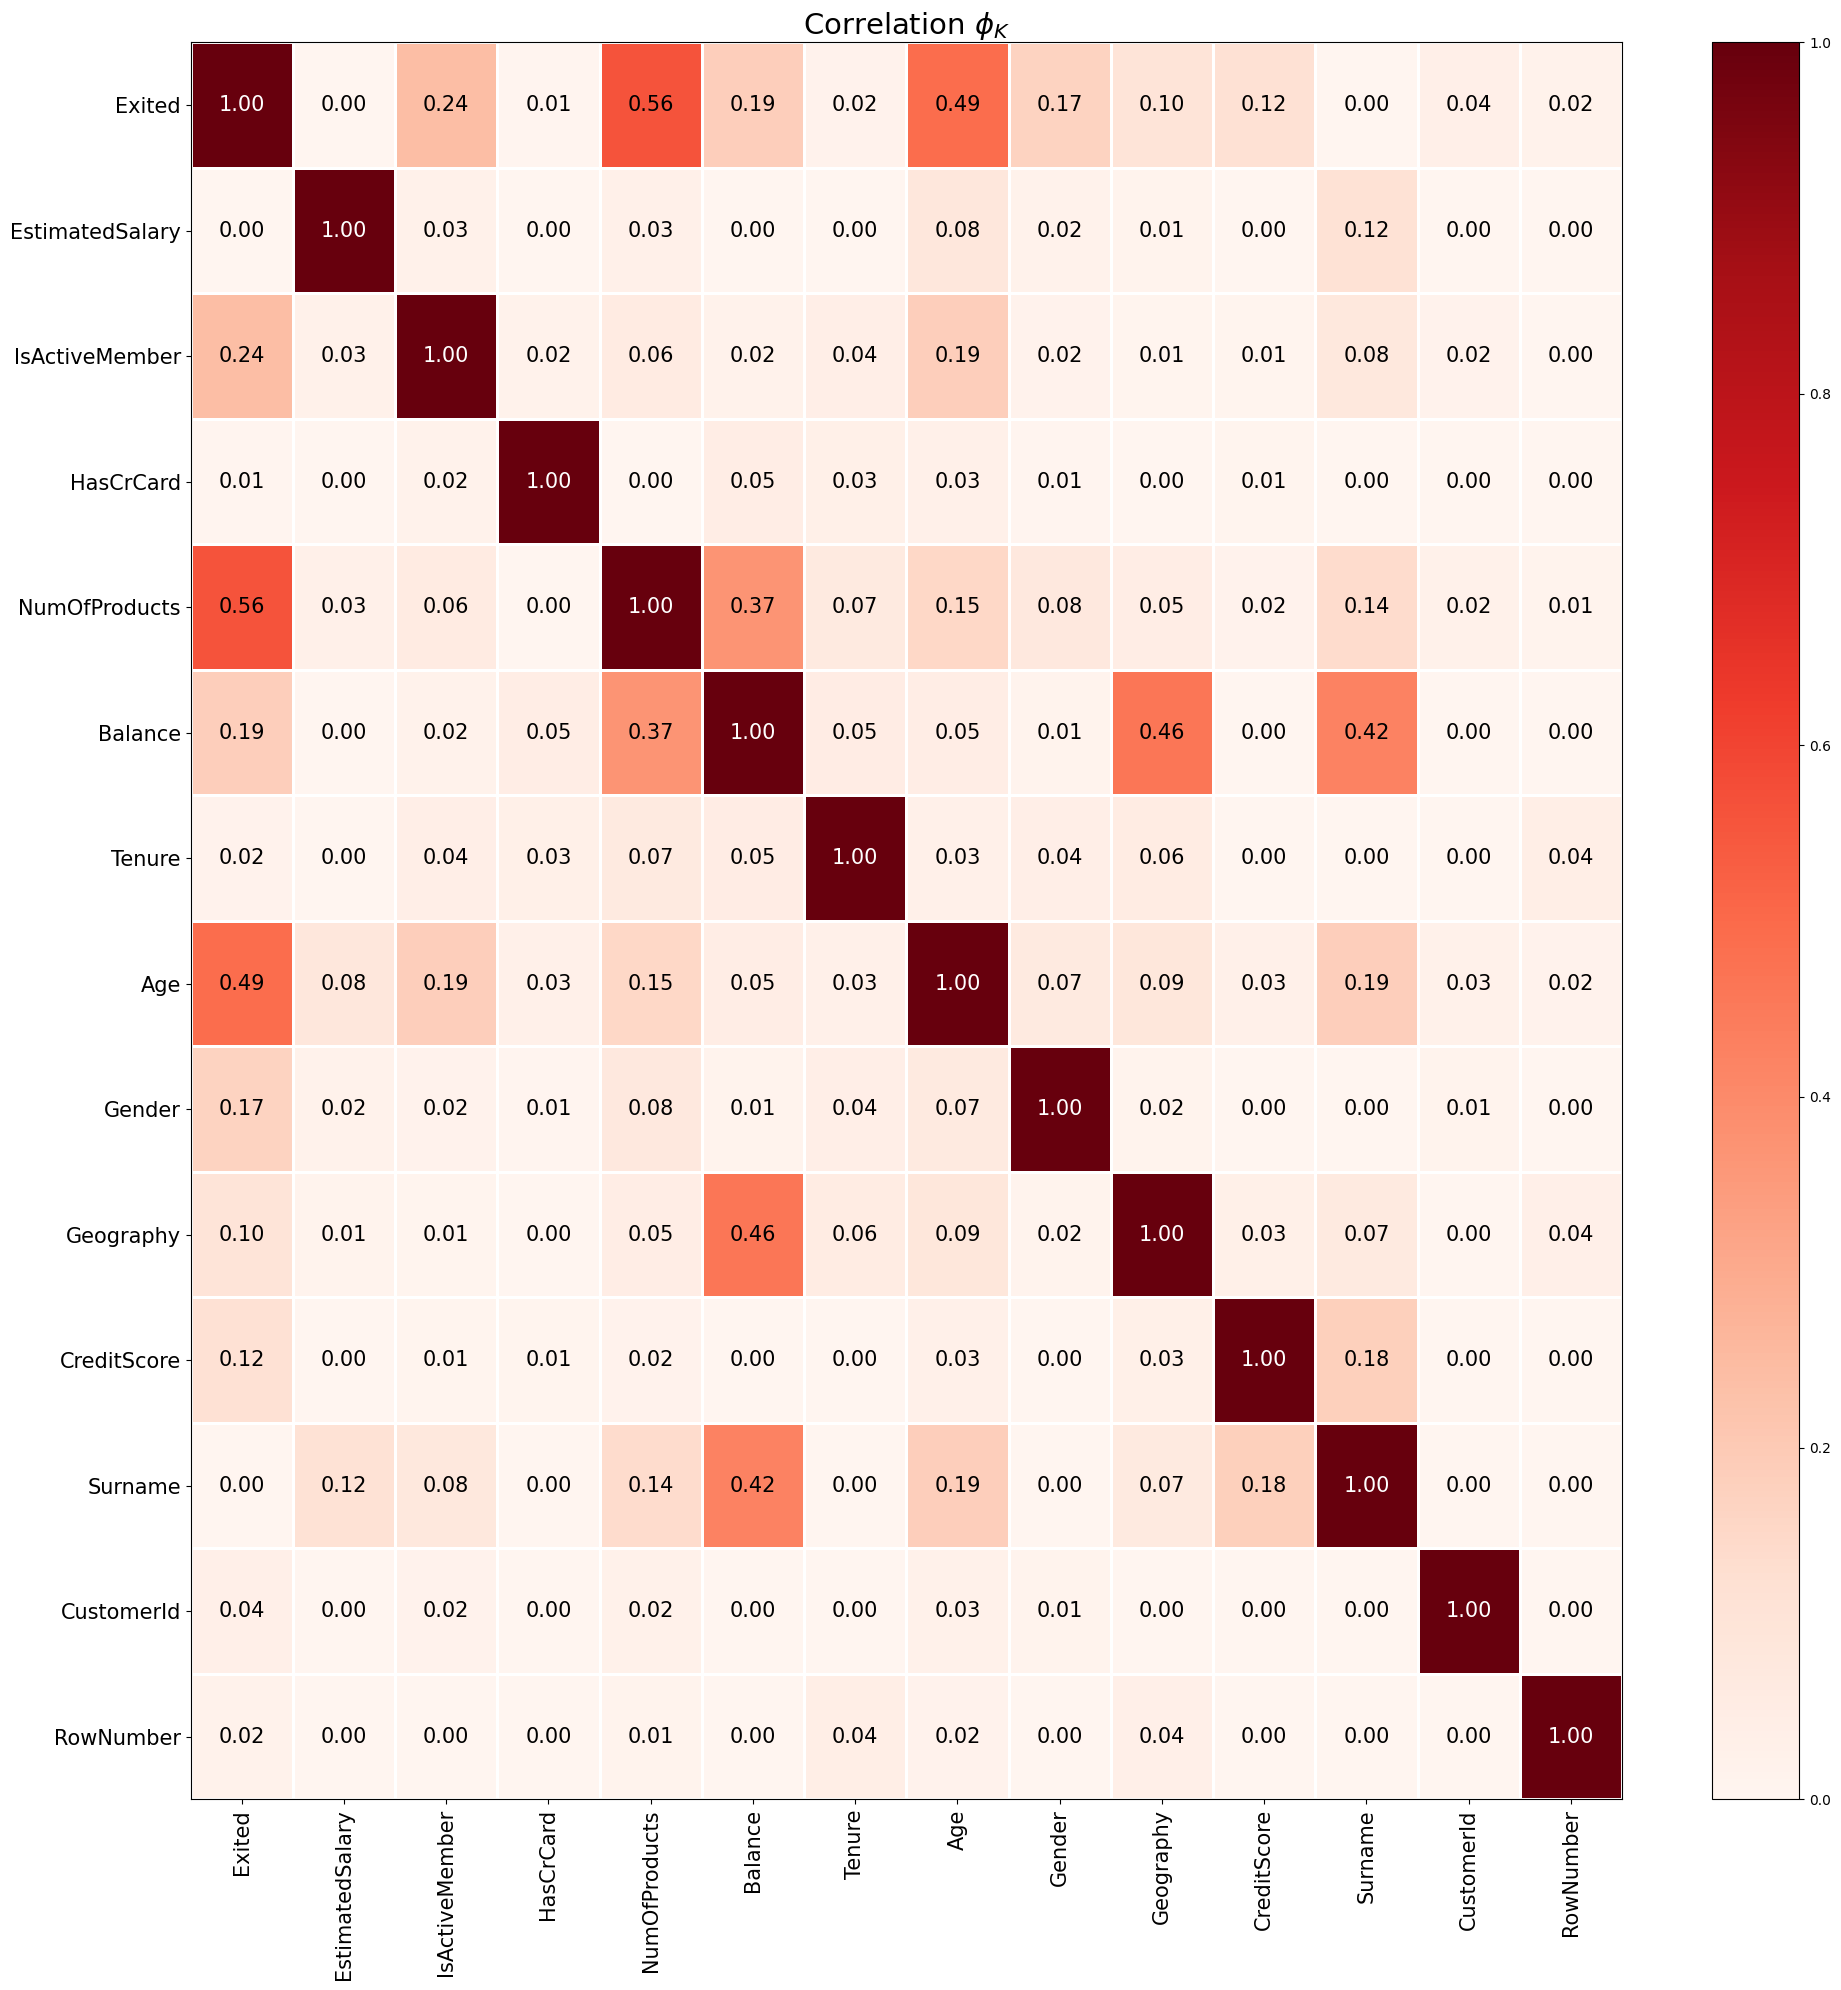

In [43]:
# Buat fungsi untuk mengkorelasikan semua column
def compute_phik_correlation_fs(dataframe, columns):
    subset = dataframe[columns]
    correlation_matrix = subset.phik_matrix()
    return correlation_matrix

# Membuat list column yang ingin dikorelasikan
columns = ['RowNumber','CustomerId','Surname','CreditScore','Geography','Gender', 
    'Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember',
    'EstimatedSalary','Exited']

# Menghitung Phi-k corelation antara setiap column
correlation_eda = compute_phik_correlation_fs(concat_train, columns)

plot_correlation_matrix(correlation_eda.values, x_labels=correlation_eda.columns, y_labels=correlation_eda.index, 
                        vmin=0, vmax=1, color_map='Reds', title=r'Correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(20,20))
plt.tight_layout()

Berdasarkan visualisasi korelasi φk terhadap target Exited, dapat disimpulkan:

* NumOfProducts (0.56) dan Age (0.49) memiliki korelasi yang relatif lebih tinggi terhadap Exited dibandingkan fitur lainnya, menunjukkan bahwa jumlah produk yang dimiliki dan usia nasabah merupakan faktor penting yang mempengaruhi apakah nasabah akan churn atau tidak.

* Balance (0.19) dan Gender (0.17) menunjukkan korelasi yang lebih rendah namun masih memiliki pengaruh terhadap kemungkinan churn, meskipun dampaknya tidak sebesar NumOfProducts dan Age.

* Sebagian besar fitur lainnya seperti Tenure, HasCrCard, EstimatedSalary, dan IsActiveMember memiliki korelasi sangat rendah (di bawah 0.1) dengan Exited, menunjukkan bahwa kontribusi mereka dalam menentukan churn sangat kecil.

Secara keseluruhan, model dapat lebih berfokus pada fitur NumOfProducts dan Age untuk meningkatkan akurasi dalam memprediksi churn, sementara beberapa fitur dengan korelasi sangat rendah mungkin tidak memberikan banyak manfaat dan dapat dipertimbangkan untuk dihilangkan dalam model prediksi.

In [44]:
# Drop column that < 0.1
X_train.drop(['RowNumber','CustomerId','Surname','Tenure','HasCrCard','EstimatedSalary'], axis = 1, inplace = True)
X_test.drop(['RowNumber','CustomerId','Surname','Tenure','HasCrCard','EstimatedSalary'], axis = 1, inplace = True)
X_train

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
7637,766.000,France,Male,32,185714.280,1.000,1
1475,634.000,France,Male,26,0.000,1.000,0
6540,571.000,Germany,Male,33,71843.150,1.000,0
6164,710.000,Germany,Male,58,170113.000,2.000,1
1353,626.000,Spain,Male,29,0.000,2.000,0
...,...,...,...,...,...,...,...
4374,688.000,Germany,Male,41,112871.190,2.000,1
8631,632.000,Germany,Male,30,72549.000,2.000,1
9818,558.000,France,Male,31,0.000,1.000,0
4041,593.000,France,Male,36,70181.480,2.000,0


* Column yang kurang berkorelasi dengan target berhasil di drop dan menyisakan 7 column terpenting

### Membuat Pipeline

In [45]:
# Check distribusi data untuk kolom final
num_cols2 = X_train.select_dtypes(exclude='object').columns
skewness2 = []

# Gunakan variabel `num_cols2` untuk iterasi kolom yang benar
for col in num_cols2:
    skew_val2 = round(X_train[col].skew(), 1)
    # Menambahkan `skew_val2` ke dalam list `skewness2` untuk menjaga konsistensi
    skewness2.append([col, skew_val2, 'normal' if abs(skew_val2) <= 0.5 else 'skewed'])

# Membuat dataframe dengan kolom yang benar
skewness2 = pd.DataFrame(skewness2, columns=['Column', 'Skewness', 'Distribution'])
print(skewness2)

           Column  Skewness Distribution
0     CreditScore    -0.100       normal
1             Age     0.600       skewed
2         Balance    -0.100       normal
3   NumOfProducts     0.600       skewed
4  IsActiveMember    -0.100       normal


In [46]:
num_pipeline1 = Pipeline([
        ('missval1', SimpleImputer(strategy='mean')),
        ('outlier1', Winsorizer(capping_method='gaussian', tail='both', fold=3)),
        ('scaler1', StandardScaler())
    ])
num_tr1 = num_pipeline1.fit_transform(X_train[['CreditScore','Balance','IsActiveMember']])

Melakukan pembuatan pipeline yang di mulai dari inputasi jika ada missing value menggunakan strategi mean, karena sebaran data normal. Kemudian akan dilakukan capping menggunakan winsorizer dengan metode gaussian kembali lagi karena sebaran data normal.

* Standarisasi Fitur Normal: Saya menggunakan StandardScaler() untuk menstandarisasi beberapa kolom numerik yang memiliki distribusi normal. Ini penting untuk memastikan setiap fitur memiliki mean 0 dan standar deviasi 1, agar model tidak bias pada skala fitur yang berbeda.

In [47]:
num_pipeline2 = Pipeline([
        ('missval', SimpleImputer(strategy='median')),
        ('outlier', Winsorizer(capping_method='iqr', tail='both', fold=1.5)),
        ('scaler', MinMaxScaler())
    ])
num_tr2 = num_pipeline2.fit_transform(X_train[['Age','NumOfProducts']])

Melakukan inputasi kali ini dengan cara median, karena data skewed. Selanjutnya akan dilakukan capping menggunakan winsorizer dengan metode iqr karena data skewed.

* Skala untuk Fitur Skewed: MinMaxScaler() digunakan untuk fitur yang distribusinya tidak normal. Skala ini mengubah nilai dalam rentang 0 hingga 1, cocok untuk menangani distribusi yang miring dan mengurangi efek outliers.

In [48]:
cat_pipeline = Pipeline([
        ('missval2', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder())
    ])

cat_tr = cat_pipeline.fit_transform(X_train[['Geography','Gender']])

Melakukan inputasi dengan strategi most_frequent/modus untuk column kategorikal.

* One-Hot Encoding untuk Fitur Kategorikal: Saya menggunakan OneHotEncoder() untuk mengonversi variabel kategorikal (Geography dan Gender) menjadi beberapa kolom biner, yang membantu model Machine Learning mengerti nilai-nilai kategori ini.

In [49]:
preprocessing = ColumnTransformer([
        ("num1", num_pipeline1, ['CreditScore','Balance','NumOfProducts','IsActiveMember']),
        ("num2", num_pipeline2, ['Age']),
        ("cat_ohe", cat_pipeline, ['Geography','Gender'])
    ])

Kemudian semua pipe yang sudah saya buat, saya gabungkan menjadi satu kesatuan yang bernama pipeline (preprocessing). Selanjutnya pipe ini akan saya masukan ke pipe berikutnya untuk mencari model yang paling tepat dan juga untuk pipline final (dengan model yang memiliki base dan hyperparameter terbaik berdasarkan recall scorenya).

# **VII. Model Definition**

In [50]:
# Membuat pipeline untuk semua alogritm yang akan saya gunakan
pipe_log = Pipeline(steps=[('preprocessing', preprocessing), ('classifier', LogisticRegression(max_iter=1000000))])
pipe_svc = Pipeline(steps=[('preprocessing', preprocessing), ('classifier', SVC())])
pipe_dt = Pipeline(steps=[('preprocessing', preprocessing), ('classifier', DecisionTreeClassifier(random_state=10))])
pipe_rf = Pipeline(steps=[('preprocessing', preprocessing), ('classifier', RandomForestClassifier(random_state=10))])
pipe_knn = Pipeline(steps=[('preprocessing', preprocessing), ('classifier', KNeighborsClassifier())])
pipe_nb = Pipeline(steps=[('preprocessing', preprocessing), ('classifier', GaussianNB())])
pipe_ada = Pipeline(steps=[('preprocessing', preprocessing), ('classifier', AdaBoostClassifier())])

Dalam proyek ini, saya memilih beberapa algoritma untuk memprediksi churn nasabah dengan tujuan utama menekan jumlah False Negative, karena kesalahan ini dapat mengakibatkan bank kehilangan nasabah tanpa adanya upaya intervensi. 
* Logistic Regression dipilih karena sederhana dan memberikan interpretasi yang jelas terkait pengaruh fitur, serta memungkinkan penyesuaian threshold untuk meningkatkan sensitivitas prediksi churn. 

* Support Vector Machine (SVM) digunakan karena kemampuannya menangani data dengan distribusi kompleks, serta cocok untuk dataset yang tidak seimbang. 

* Decision Tree dipilih karena mampu menangani hubungan non-linear antar fitur dan mudah diinterpretasi, meskipun berisiko overfitting jika tidak dibatasi.

* Random Forest digunakan sebagai ensemble model yang menggabungkan banyak decision tree untuk mengurangi variansi dan memberikan hasil prediksi yang lebih stabil. 

* K-Nearest Neighbors (KNN) diimplementasikan karena efektivitasnya dalam mendeteksi pola lokal pada data, namun perlu diperhatikan karena sensitif terhadap noise dan skala fitur. 

* Naive Bayes dipilih karena model probabilistik ini cepat dan efisien, serta bekerja baik meskipun terdapat asumsi independensi antar fitur.

* AdaBoost digunakan sebagai teknik boosting yang fokus memperbaiki kesalahan model sebelumnya, sehingga adaptif dalam mengklasifikasikan nasabah berisiko tinggi, meskipun rentan terhadap outlier. Pendekatan beragam ini memungkinkan perbandingan kinerja model untuk memaksimalkan deteksi churn dan meningkatkan strategi retensi nasabah.

Dari seluruh pipe yang berisikan algoritma yang berbeda-beda ini saya akan hanya memilih 1 yang paling representatif dan selanjutnya akan saya lakukan hyperparameter tuning menggunakan algoritm tersebut.

# **VIII. Model Training**

### Cross-Validation

In [51]:
skfold=StratifiedKFold(n_splits=5)

StratifiedKFold membantu menjaga distribusi kelas yang seimbang di setiap fold, yang membuat evaluasi model lebih adil dan akurat, terutama dalam kasus data ini yang tidak seimbang.

In [52]:
cv_log_model = cross_val_score(pipe_log, X_train, y_train, cv=skfold, scoring="recall")
cv_svm_model = cross_val_score(pipe_svc, X_train, y_train, cv=skfold, scoring="recall")
cv_dt_model = cross_val_score(pipe_dt, X_train, y_train, cv=skfold, scoring="recall")
cv_rf_model = cross_val_score(pipe_rf, X_train, y_train, cv=skfold, scoring="recall")
cv_knn_model = cross_val_score(pipe_knn, X_train, y_train, cv=skfold, scoring="recall")
cv_nb_model = cross_val_score(pipe_nb, X_train, y_train, cv=skfold, scoring="recall")
cv_ada_model = cross_val_score(pipe_ada, X_train, y_train, cv=skfold, scoring="recall")
name_model = []
cv_scores=0
for cv,name in zip([cv_log_model,cv_svm_model,cv_dt_model,cv_rf_model,cv_knn_model,cv_nb_model,cv_ada_model],['pipe_log','pipe_svc','pipe_dt','pipe_rf','pipe_knn','pipe_nb','pipe_ada']):
    print(name)
    print('Recall - All - Cross Validation  : ', cv)
    print('Recall - Mean - Cross Validation : ', cv.mean())
    print('Recall - Std - Cross Validation  : ', cv.std())
    print('Recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

pipe_log
Recall - All - Cross Validation  :  [0.23529412 0.24458204 0.22291022 0.2755418  0.24148607]
Recall - Mean - Cross Validation :  0.2439628482972136
Recall - Std - Cross Validation  :  0.017447681490532975
Recall - Range of Test-Set       :  0.22651516680668063 - 0.2614105297877466
--------------------------------------------------
pipe_svc
Recall - All - Cross Validation  :  [0.37151703 0.34674923 0.30959752 0.36842105 0.36532508]
Recall - Mean - Cross Validation :  0.3523219814241486
Recall - Std - Cross Validation  :  0.023035387291316742
Recall - Range of Test-Set       :  0.32928659413283184 - 0.3753573687154654
--------------------------------------------------
pipe_dt
Recall - All - Cross Validation  :  [0.48916409 0.50464396 0.54798762 0.52321981 0.52631579]
Recall - Mean - Cross Validation :  0.5182662538699689
Recall - Std - Cross Validation  :  0.02002595867343186
Recall - Range of Test-Set       :  0.49824029519653706 - 0.5382922125434008
---------------------------

Saya memilih `Recall sebagai metrik utama` untuk mengevaluasi model ini karena prioritas utama adalah `mengurangi False Negatives`, di mana nasabah yang berpotensi churn tidak terdeteksi oleh model. Hal ini sangat penting agar bank dapat melakukan intervensi tepat waktu. Dengan nilai Recall yang lebih tinggi, model akan lebih efektif dalam mendeteksi nasabah yang berisiko untuk churn.

Berdasarkan hasil evaluasi yang telah saya lakukan, `Decision Tree (dt_model)` menunjukan Recall Mean sebesar 0.518 dengan rentang 0.498 - 0.538. Decision Tree menghasilkan performa recall terbaik, dengan kemampuan mendeteksi lebih dari 51% nasabah yang berpotensi churn, sehingga model ini paling cocok untuk diterapkan dalam skenario saat ini. Meski beberapa model lain seperti Random Forest, AdaBoost, dan SVM juga memberikan performa yang cukup baik, namun masih belum mampu menyaingi Decision Tree dalam hal recall.

Selanjutnya saya akan menggunakan Decision Tree sebagai model baseline untuk tahap selanjutnya. Selain itu, saya juga akan melakukan hyperparameter tuning agar performanya semakin baik.

In [ ]:
# Membuat fungsi untuk eval model
def base_model_train_eval(model):
    mod = model
    mod.fit(X_train, y_train)

    # Predik training dan testing
    mod_train = mod.predict(X_train)
    mod_test = mod.predict(X_test)

    # Print formating
    print('                              TRAIN')
    print(classification_report(y_train, mod_train,target_names=['Stay', 'Leave']))
    print('-'*60)
    print('                              TEST')
    print(classification_report(y_test, mod_test,target_names=['Stay', 'Leave']))

    # Plotting Confusion Matrices untuk tran dan test
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Train
    train_matrix = ConfusionMatrixDisplay.from_estimator(mod, X_train, y_train, cmap='PuBu', ax=axes[0])
    train_matrix.ax_.set_title('Confusion Matrix - Training Data')

    # Test
    test_matrix = ConfusionMatrixDisplay.from_estimator(mod, X_test, y_test, cmap='PuBu', ax=axes[1])
    test_matrix.ax_.set_title('Confusion Matrix - Test Data')

    plt.tight_layout()
    plt.show()

Membuat function untuk mempermudah evaluasi model yang akan digunakan (confusion matrix, confusion matrix display dan classification report)

                              TRAIN
              precision    recall  f1-score   support

        Stay       1.00      1.00      1.00      6385
       Leave       1.00      1.00      1.00      1615

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

------------------------------------------------------------
                              TEST
              precision    recall  f1-score   support

        Stay       0.87      0.85      0.86      1578
       Leave       0.48      0.52      0.50       422

    accuracy                           0.78      2000
   macro avg       0.68      0.69      0.68      2000
weighted avg       0.79      0.78      0.78      2000



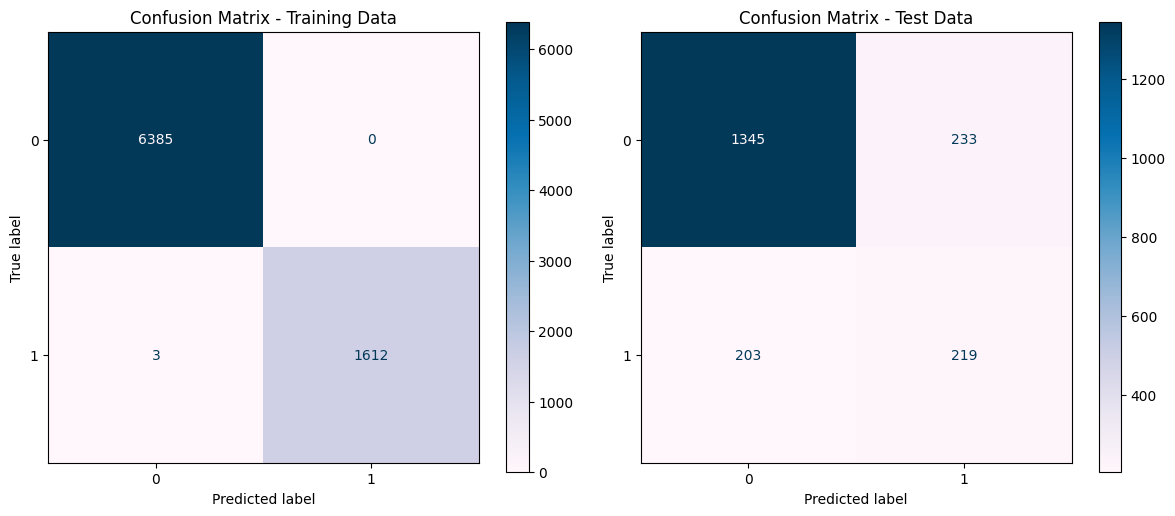

In [54]:
base_model_train_eval(pipe_dt)

#### Classification Report:
Hasil evaluasi model Decision Tree Classifier menunjukkan bahwa model memiliki performa yang sangat tinggi pada data training, dengan accuracy sebesar 100% di seluruh metrik evaluasi (precision, recall, f1-score). Namun, performa menurun signifikan pada data testing dengan accuracy sebesar 78%, dan metrik recall untuk kelas 'Leave' sebesar 52%.

Kesimpulan: Model ini mengalami overfitting, yaitu terlalu "menghafal" data training, sehingga tidak dapat generalisasi dengan baik pada data baru (test set). Hal ini tampak dari perbedaan besar antara performa di data training dan data testing. Untuk meningkatkan performa pada data testing, model perlu dioptimalkan lebih lanjut, selanjutnya akan dilakukan hyperparameter tuning.

#### Confusion Matrix
Hasil Confusion Matrix menunjukkan bahwa model Decision Tree bekerja sangat baik pada data train dengan hampir tidak ada kesalahan, yaitu hanya ada 3 kesalahan dalam memprediksi kelas 'Leave'. Namun, performa menurun pada data test, di mana model melakukan kesalahan lebih banyak, dengan 233 False Positive dan 203 False Negative.

Hal ini memperkuat bukti bahwa model mengalami overfitting karena performa yang jauh lebih baik pada data train dibandingkan dengan data test. Hal ini mengindikasikan bahwa model menghafal data train dan kurang mampu untuk melakukan generalisasi terhadap data baru. Selanjutnya saya akan melakukan hyperparameter tuning.

In [ ]:
# Fit the Decision Tree model ke training data
pipe_dt.fit(X_train, y_train)

# Membuat prediksi untuk training dan test data
y_pred_train = pipe_dt.predict(X_train)
y_pred_test = pipe_dt.predict(X_test)

In [ ]:
# Membuat fungsi performance report
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
    # kalkulasi recall scores
    score_reports = {
        'Recall Train Set': recall_score(y_train, y_pred_train),
        'Recall Test Set': recall_score(y_test, y_pred_test),
    }

    # Calculate confusion matrices untuk train dan test sets
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    # Extract false negatives dari confusion matrices dan add ke report
    score_reports['False Negative Train'] = cm_train[1, 0]
    score_reports['False Negative Test'] = cm_test[1, 0]

    # Simpan report kedalam dictionary dengan nama modelnya
    all_reports[name] = score_reports
    return all_reports

all_reports = {}
all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Decision Tree without Tuning')

pd.DataFrame(all_reports)

,Decision Tree without Tuning
Recall Train Set,0.998
Recall Test Set,0.519
False Negative Train,3.000
False Negative Test,203.000


Model Decision Tree tanpa tuning menunjukkan recall yang sangat tinggi pada data train sebesar 99.8%, sementara pada data test hanya 51.9%. Ini menandakan bahwa model memiliki kemampuan mendeteksi nasabah yang akan churn dengan sangat baik pada data train, tetapi performanya menurun drastis saat ditest dengan data baru. Jumlah False Negatives yang jauh lebih rendah pada data train (3) dibandingkan data test (203) menunjukkan bahwa model ini mengalami overfitting, yaitu terlalu baik dalam mengenali pola di data train, tetapi gagal dalam melakukan generalisasi terhadap data test.

# **IX. Model Evaluation**

### Hyperparameter Tuning

In [57]:
params = [{       
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__splitter': ['best', 'random'],
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 5, 6, 7, 10],
    'classifier__class_weight': [None, 'balanced']
}]

# Membuat objek GridSearchCV
grid_search = GridSearchCV(pipe_dt, param_grid=params, cv=skfold,
                           scoring='recall',
                           return_train_score=True)

# Melakukan fit pada GridSearchCV
grid_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik dan skor recall
print('Best hyperparameters for Decision Tree:', grid_search.best_params_)
print('Best recall for Decision Tree:', grid_search.best_score_)

# Menyimpan model terbaik ke dalam variabel
best_dt_model = grid_search.best_estimator_

Best hyperparameters for Decision Tree: {'classifier__class_weight': 'balanced', 'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 7, 'classifier__min_samples_split': 2, 'classifier__splitter': 'random'}
Best recall for Decision Tree: 0.7424148606811145


In [58]:
grid_search.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__criterion': 'entropy',
 'classifier__max_depth': 10,
 'classifier__min_samples_leaf': 7,
 'classifier__min_samples_split': 2,
 'classifier__splitter': 'random'}

Hasil hyperparameter tuning menunjukkan peningkatan kinerja Decision Tree Classifier dengan konfigurasi terbaik menggunakan kriteria 'entropy', bobot kelas 'balanced', kedalaman maksimum 10, dan minimal 7 sampel per daun. Konfigurasi ini membantu mencegah overfitting dan meningkatkan sensitivitas model terhadap kelas 'Leave'. Dengan recall mencapai 74.2%, model kini lebih efektif dalam mengidentifikasi nasabah yang berpotensi churn, sesuai dengan fokus utama saya untuk menekan jumlah False Negative dan meningkatkan akurasi deteksi nasabah churn, sehingga bank dapat lebih proaktif dalam strategi retensi.

                              TRAIN
              precision    recall  f1-score   support

        Stay       0.94      0.81      0.87      6385
       Leave       0.51      0.80      0.63      1615

    accuracy                           0.81      8000
   macro avg       0.73      0.80      0.75      8000
weighted avg       0.86      0.81      0.82      8000

------------------------------------------------------------
                              TEST
              precision    recall  f1-score   support

        Stay       0.92      0.77      0.84      1578
       Leave       0.47      0.76      0.58       422

    accuracy                           0.77      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.77      0.78      2000



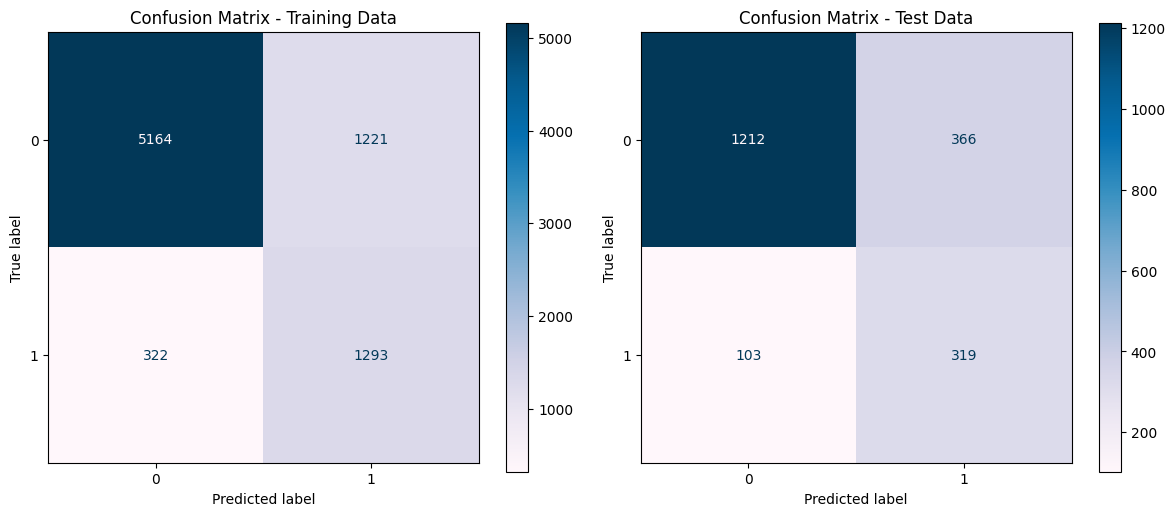

In [59]:
base_model_train_eval(best_dt_model)

Dari hasil evaluasi setelah hyperparameter tuning, performa model Decision Tree Classifier menunjukkan peningkatan dalam mendeteksi nasabah churn, terlihat dari recall kelas 'Leave' yang turun menjadi `80%` pada data `training` dan `76%` pada data `testing`. Penurunan recall pada kelas 'Leave' sangat wajar karena pada model sebelum di lakukan tuning, model cenderung overfiting, jadi setelah dilakukan hyperparameter tuning ini model lebih sesuai dan realistis. Namun, precision untuk kelas 'Leave' tetap rendah (51% pada train dan 47% pada test), menunjukkan model masih menghasilkan banyak False Positives. Akurasi model berada di 81% pada data training dan 77% pada data testing, yang mengindikasikan kemampuan generalisasi yang lebih baik dibandingkan sebelumnya. Meskipun recall meningkat, precision yang rendah pada kelas 'Leave' menunjukkan bahwa model perlu dioptimalkan lebih lanjut untuk meningkatkan akurasi deteksi nasabah yang benar-benar berisiko churn tanpa terlalu banyak kesalahan prediksi.

In [60]:
# Dapatkan prediksi untuk data latih dan data uji menggunakan model yang sudah dituning hyperparameter-nya.
y_pred_train_tuned = best_dt_model.predict(X_train)
y_pred_test_tuned = best_dt_model.predict(X_test)

In [ ]:
# Maukan kedalam report
all_reports = performance_report(all_reports, y_train, y_pred_train_tuned, y_test, y_pred_test_tuned, 'Decision Tree with Tuning')
pd.DataFrame(all_reports)

,Decision Tree without Tuning,Decision Tree with Tuning
Recall Train Set,0.998,0.801
Recall Test Set,0.519,0.756
False Negative Train,3.000,322.000
False Negative Test,203.000,103.000


Setelah melakukan tuning hyperparameter, model Decision Tree menunjukkan peningkatan performa yang signifikan dalam mendeteksi nasabah yang berpotensi churn. Sebelumnya, tanpa tuning, model menghasilkan nilai recall yang sangat tinggi pada Train Set (0.998), tetapi rendah pada Test Set (0.519). Hal ini mengindikasikan adanya overfitting, di mana model terlalu baik dalam mempelajari data latih, tetapi tidak mampu generalisasi pada data baru.

Setelah tuning, recall pada Train Set menurun menjadi 0.801, yang menunjukkan bahwa model tidak lagi terlalu terpaku pada data latih dan menjadi lebih umum. Recall pada Test Set meningkat menjadi 0.756, yang menandakan peningkatan signifikan dalam kemampuan mendeteksi nasabah churn pada data baru.

Selain itu, jumlah False Negative pada Test Set juga menurun dari 203 menjadi 103, menunjukkan bahwa model yang sudah dituning lebih mampu dalam mendeteksi nasabah yang benar-benar berisiko churn. Ini adalah tujuan utama, yaitu meminimalkan False Negative agar bank dapat mengidentifikasi dan menangani nasabah yang mungkin akan meninggalkan layanan. Secara keseluruhan, tuning ini membuat model lebih stabil dan efektif, dengan performa yang lebih seimbang antara data latih dan data uji.

In [62]:
y_logreg_pred = best_dt_model.predict(X_test)
y_logreg_pred

array([1, 1, 1, ..., 0, 0, 0])

In [63]:
# Menghitung ROC AUC Score
roc_auc = roc_auc_score(y_test, y_logreg_pred)
print(f"ROC AUC Score: {roc_auc:.3f}")

ROC AUC Score: 0.762


Dengan nilai ROC AUC Score sebesar 0.762, model ini memiliki kemampuan yang cukup baik untuk membedakan antara nasabah yang akan churn dan yang tidak. Model dapat mengidentifikasi kelas positif dan negatif dengan akurasi yang lumayan, namun masih terdapat ruang yang cukup besar untuk perbaikan.

Meskipun model telah menunjukkan performa yang lumayan baik, peningkatan lebih lanjut seperti pengayaan fitur, tuning hyperparameter lebih mendalam, atau penggunaan model lain yang lebih kompleks mungkin diperlukan untuk mendapatkan performa yang lebih optimal dan mencapai nilai AUC yang lebih tinggi.

In [64]:
# Cross Validation
recall_train_cross_val = cross_val_score(best_dt_model,
                                     X_train,
                                     y_train,
                                     cv=skfold,
                                     scoring="recall")

print('Best Model Cross-Validation')
print('recall Score - All - Cross Validation  : ', recall_train_cross_val)
print('recall Score - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('recall Score - Std - Cross Validation  : ', recall_train_cross_val.std())
print('recall Score - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

Best Model Cross-Validation
recall Score - All - Cross Validation  :  [0.78328173 0.73993808 0.76470588 0.73065015 0.69349845]
recall Score - Mean - Cross Validation :  0.7424148606811145
recall Score - Std - Cross Validation  :  0.030673600189475757
recall Score - Range of Test-Set       :  0.7117412604916388 - 0.7730884608705902



Setelah dilakukan hyperparameter tuning pada model Decision Tree, hasil validasi silang menunjukkan peningkatan performa yang cukup signifikan dalam mendeteksi nasabah yang berpotensi churn. Nilai Recall rata-rata pada validasi silang mencapai 0.742, dengan standar deviasi sebesar 0.030. Rentang Recall berada antara 0.711 hingga 0.773, yang menunjukkan model mampu secara konsisten menangkap nasabah yang berpotensi churn di berbagai subset data.

Kesimpulannya, model yang telah di-tuning menunjukkan performa yang lebih stabil dan dapat diandalkan dibandingkan dengan model sebelumnya, dengan Recall yang lebih tinggi dan rentang yang tidak terlalu lebar, model ini lebih cocok untuk digunakan dalam upaya proaktif bank untuk mencegah churn, terutama dengan mengidentifikasi nasabah yang berisiko tinggi untuk meninggalkan bank. Hal ini penting agar bank dapat mengambil tindakan preventif dan meningkatkan retensi nasabah secara lebih efektif.

In [65]:
# Display workflow best model pipeline terakhir sebelum di saving
best_dt_model

best_dt_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num1',
                                                  Pipeline(steps=[('missval1',
                                                                   SimpleImputer()),
                                                                  ('outlier1',
                                                                   Winsorizer(fold=3,
                                                                              tail='both')),
                                                                  ('scaler1',
                                                                   StandardScaler())]),
                                                  ['CreditScore', 'Balance',
                                                   'NumOfProducts',
                                                   'IsActiveMember']),
                                                 ('num2',
                                                  Pipeline(steps=[('missval',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('outlier',
                                                                   Winsorizer(cappin...='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age']),
                                                 ('cat_ohe',
                                                  Pipeline(steps=[('missval2',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Geography', 'Gender'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=10,
                                        min_samples_leaf=7, random_state=10,
                                        splitter='random'))])

Pipeline ini sudah mengandung preprocessing dengan sangat detail dan akan melakukan modeling dengan best algoritm yaitu DecisionTreeClassifier dengan hyperparameter (class_weight='balanced', criterion='entropy', max_depth=10, min_samples_leaf=7, random_state=10, splitter='random')

# **X. Model Saving**

In [66]:
# Save the best model
with open('best_dt_model.pkl','wb') as file_1:
  pickle.dump(best_dt_model, file_1)

# **XI. Kesimpulan**

#### Kesimpulan Model:
* Saya menggunakan berbagai algoritma seperti Logistic Regression, SVM, Decision Tree, Random Forest, KNN, Naive Bayes, dan AdaBoost untuk membangun model prediksi churn. Setelah evaluasi, Decision Tree Classifier dipilih karena menunjukkan performa terbaik, dengan nilai mean recall sebesar 51% pada cross-validation. Model kemudian dioptimalkan melalui hyperparameter tuning, menghasilkan konfigurasi optimal dengan kriteria 'entropy', kedalaman maksimum 10, bobot kelas 'balanced', dan minimal 7 sampel per daun. Model ini mencapai recall sebesar 76% pada data testing, yang meningkatkan kemampuan dalam mendeteksi nasabah yang berisiko churn dengan mengurangi False Negatives. Namun, precision untuk kelas 'Leave' masih rendah (47%), yang mengindikasikan adanya banyak False Positives. Akurasi keseluruhan model adalah 77%, dengan fokus utama pada recall. Hal ini menunjukkan bahwa model memiliki sensitivitas yang baik dalam mendeteksi churn, tetapi masih perlu peningkatan lebih lanjut untuk menyeimbangkan precision dan recall agar intervensi terhadap nasabah yang berisiko dapat lebih akurat.

#### Kelebihan & Kekurangan Model
* Model Decision Tree Classifier yang saya pilih memiliki sejumlah kelebihan dan kekurangan. Kelebihannya, model ini sudah efektif dalam menekan jumlah False Negatives dan mampu menangani hubungan non-linear antar fitur dengan baik. Selain itu, tuning hyperparameter berhasil meningkatkan recall, yang penting untuk memaksimalkan deteksi nasabah churn dan mengurangi False Negatives. Namun, kelemahan utama model ini adalah rentan terhadap overfitting, terutama pada dataset yang kompleks. Meskipun tuning telah membantu mengurangi risiko ini, precision yang rendah pada kelas 'Leave' masih menyebabkan banyak False Positives, sehingga diperlukan optimasi lebih lanjut untuk meningkatkan akurasi model secara keseluruhan tanpa mengorbankan sensitivitas dalam mengidentifikasi nasabah berisiko churn.

#### Peningkatan Model
* Untuk meningkatkan performa model prediksi churn yang telah dibangun, langkah pertama yang perlu dilakukan adalah menangani ketidakseimbangan data pada target 'Exited'. Dari hasil visualisasi data pada EDA, terlihat bahwa jumlah nasabah yang churn (2037) jauh lebih sedikit dibandingkan nasabah yang tidak churn (7963). Ketidakseimbangan ini berpotensi membuat model lebih cenderung memprediksi kelas mayoritas, sehingga meningkatkan risiko terjadinya False Negatives. Untuk mengatasi hal ini, saya dapat menggunakan teknik oversampling seperti SMOTE untuk menambah jumlah sampel kelas minoritas, atau undersampling untuk mengurangi sampel dari kelas mayoritas. Alternatif lainnya adalah menerapkan class weighting, seperti yang sudah digunakan pada Decision Tree dengan pengaturan class_weight='balanced'. Dengan menyeimbangkan data sebelum modeling, diharapkan performa model akan meningkat, terutama dalam hal precision dan recall pada kelas 'Leave', sehingga model dapat lebih akurat dalam mengidentifikasi nasabah yang berisiko churn. Selain itu, menambahkan fitur dengan korelasi yang lebih kuat terhadap target 'Exited' juga bisa membantu meningkatkan kualitas prediksi model secara keseluruhan.

#### Kesimpulan EDA
* Hasil Exploratory Data Analysis (EDA) mengungkapkan bahwa dataset nasabah memiliki ketidakseimbangan pada target 'Exited', dengan hanya sekitar 20% nasabah yang churn. Terdapat variasi signifikan pada fitur seperti usia, skor kredit, saldo, dan jumlah produk bank yang dimiliki, yang semuanya dapat memengaruhi risiko churn. Analisis juga menunjukkan bahwa nasabah perempuan dan nasabah dari Jerman memiliki kecenderungan churn yang lebih tinggi, sedangkan nasabah yang aktif cenderung lebih setia. Korelasi yang ditemukan memperlihatkan bahwa fitur seperti NumOfProducts dan Age memiliki dampak signifikan terhadap churn, sedangkan fitur dengan korelasi rendah seperti HasCrCard dan EstimatedSalary memberikan sedikit kontribusi prediktif. Hal ini menunjukkan pentingnya fokus pada fitur yang relevan serta penggunaan teknik balancing data dan seleksi fitur untuk mengoptimalkan performa model.

#### Efek Informasi EDA Untuk Bank X
* Informasi EDA ini memberikan manfaat strategis bagi Bank X dalam meningkatkan retensi nasabah dan memahami faktor risiko churn. Dengan mengetahui bahwa fitur seperti NumOfProducts, Age, dan keaktifan nasabah memiliki pengaruh besar, bank dapat menyusun strategi yang lebih personal dan efektif, terutama untuk segmen nasabah dengan risiko tinggi. Misalnya, nasabah perempuan dan nasabah di Jerman yang memiliki kecenderungan churn lebih tinggi dapat menjadi sasaran utama dalam kampanye retensi. Selain itu, dengan kesadaran akan ketidakseimbangan target, penerapan strategi balancing data dapat memperbaiki akurasi model dan mengurangi False Negatives, sehingga nasabah yang berisiko churn dapat diidentifikasi lebih akurat. Langkah ini memungkinkan Bank X untuk melakukan intervensi proaktif, meningkatkan loyalitas nasabah bernilai tinggi, dan memperkuat daya saing bank dalam pasar perbankan yang kompetitif.

# **XII. Conceptual Problem**

### Question:

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

3. Jelaskan apa yang dimaksud dengan Cross Validation !

### Answer:

1. Dalam pengembangan model prediksi churn nasabah di Bank X, overfitting menjadi tantangan besar, terutama pada data dengan variansi tinggi dan kompleksitas fitur yang signifikan. Untuk mengatasinya, digunakan teknik bagging (Bootstrap Aggregating) sebagai metode ensemble yang efektif dalam mengurangi variansi model, sehingga menghasilkan prediksi yang lebih stabil dan akurat. Bagging bekerja dengan membuat beberapa subset data menggunakan bootstrap sampling, melatih model pada setiap subset secara terpisah, lalu menggabungkan hasil prediksi menggunakan agregasi, seperti rata-rata untuk regresi atau voting mayoritas untuk klasifikasi. Dalam konteks prediksi churn, bagging membantu meminimalkan kesalahan, terutama False Negative, memungkinkan bank untuk melakukan intervensi lebih cepat, meningkatkan retensi, dan menjaga loyalitas nasabah bernilai tinggi.

2. Dalam proyek ini, saya menggunakan Random Forest dan AdaBoost, dua algoritma ensemble dengan pendekatan berbeda. Random Forest menerapkan teknik bagging, melatih banyak decision tree secara paralel pada subset data yang diambil melalui bootstrap sampling. Setiap pohon bekerja secara independen, dan hasil prediksi akhir ditentukan oleh voting mayoritas, yang membantu mengurangi variansi serta risiko overfitting. Sebaliknya, AdaBoost menggunakan metode boosting, melatih model secara berurutan, di mana setiap model baru berfokus memperbaiki kesalahan dari model sebelumnya dengan memberi bobot lebih tinggi pada sampel yang sulit diklasifikasikan. Prediksi akhir diperoleh melalui weighted voting, membuat AdaBoost lebih adaptif tetapi juga lebih rentan terhadap outlier. Sementara Random Forest berfokus pada stabilitas dengan mengurangi variansi, AdaBoost mengoptimalkan akurasi dengan meminimalkan bias, meskipun memiliki risiko overfitting pada dataset kecil.

3. Cross Validation merupakan metode evaluasi model yang bertujuan untuk memperkirakan performa model pada data yang belum pernah dilihat sebelumnya. Dalam proses ini, dataset dibagi menjadi beberapa bagian yang disebut fold. Pada setiap iterasi, satu fold dipilih sebagai data validasi, sementara fold lainnya digunakan untuk pelatihan model. Model dilatih menggunakan data pelatihan dan kemudian dievaluasi pada data validasi. Prosedur ini diulangi sebanyak k kali, sesuai dengan jumlah fold yang ditentukan (k-fold). Metode ini membantu menghindari kelemahan evaluasi pada satu dataset tunggal, seperti bias atau hasil yang kebetulan. Dengan menggunakan Cross Validation, estimasi kemampuan model dalam melakukan generalisasi menjadi lebih andal dan akurat.